### Zadatak 3.

Jedan proizvodjač kafe je u toku 12 nedelja pratio uspešnost prodaje kesica kafe u zavisnosti od širine dela police koju je imao na raspolaganju. Tako dobijene vrednosti su zabeležene u datoteci coffee.csv.

a) Nacrtati grafik zavisnosti prodaje kesica kafe u odnosu na širine police. Da li postoji opravdanje za modelovanje ovog problema linearnom regresijom?

b) Odrediti odgovarajući regresioni model korišćenjem biblioteke scikit-learn.

c) Odrediti regresioni model **bez** korišćenja biblioteke sciki-learn.

d) Dati ocenu greške modela na osnovu kontrolnih podataka koji su sadržani u datoteci *coffee_validation.csv*.

In [58]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [59]:
df = pd.read_csv('coffee.csv')
shelfSpace = df['ShelfSpace']
sales = df['Sales']

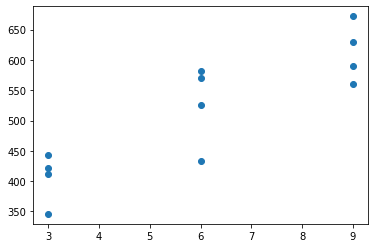

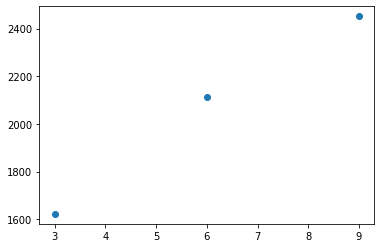

In [60]:
#prvi plot
plt.scatter(shelfSpace, sales)
plt.show()

# drugi malo lepsi sa koga se vidi da moze da se modeluje regresijom (?)
salesMap = {}
for size in shelfSpace.unique():
    salesMap[size] = 0
    
for i in range(len(sales)):
    salesMap[shelfSpace[i]] += sales[i]

salesPlot = []
shelfSizePlot = []

for key, value in salesMap.items():
    shelfSizePlot.append(key)
    salesPlot.append(value)
    
plt.scatter(shelfSizePlot, salesPlot)
plt.show()

In [61]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [62]:
X_train = shelfSpace.to_numpy()
y_train = sales.to_numpy()

# skelarn se zali ako ovi nisu zadati kao kolone pa mora ovako (?)
X_train = X_train.reshape(-1,1)
#y_train = y_train.reshape(-1,1)

model = linear_model.LinearRegression()

model.fit(X_train, y_train)

print(f'model: {model.intercept_} + {model.coef_} * x = y')

model: 307.91666666666663 + [34.58333333] * x = y


In [63]:
testData = pd.read_csv('coffee_validation.csv')
X_test = testData['ShelfSpace'].to_numpy()
y_test = testData['Sales'].to_numpy()

# skelarn se zali ako ovi nisu zadati kao kolone pa mora ovako (?)
X_test = X_test.reshape(-1,1)
#y_test = y_test.reshape(-1,1)

y_predicted = model.predict(X_test)
print(y_test)
print(y_predicted)

#  ova 2 pucaju iz nekog razloga
#confusion_matrix(y_test, y_predicted)
#classification_report(y_test, y_predicted)


[287 569 580 398 602 440 500]
[377.08333333 515.41666667 584.58333333 411.66666667 550.
 515.41666667 446.25      ]


model: 307.9166666666668 + 34.58333333333336 * x = y


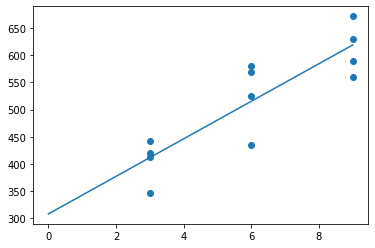

In [64]:
# bez sklearn
import numpy.linalg as LA

A = shelfSpace.to_numpy()
A = np.vstack( (np.ones(len(shelfSpace)), A) ).T
b = sales.to_numpy()

sol, rss, _, _ = LA.lstsq(A, b, rcond=None)
beta0, beta1 = sol
print(f'model: {beta0} + {beta1} * x = y')

xs = range(10)
ys = [beta0 + beta1*x for x in xs]
plt.plot(xs, ys)
plt.scatter(shelfSpace, sales)
plt.show()